In [1]:
# Libraries - Packages
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm, ConfusionMatrixDisplay as cmd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from numpy import percentile
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Pink Purple theme
colors = ["#FFC0CB", "#FF69B4", "#C71585", "#8B008B"]  # light pink → hot pink → dark magenta → purple
cmap = plt.cm.colors.LinearSegmentedColormap.from_list("pink_purple", colors)

In [3]:
# Load Dataset

iris= pd.DataFrame(datasets.load_iris().data)

iris.columns = datasets.load_iris().feature_names

iris['type'] = datasets.load_iris().target

iris['type']=iris['type'].astype('object')


In [4]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
iris.shape

(150, 5)

In [6]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'type'],
      dtype='object')

In [7]:
iris.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
type,0


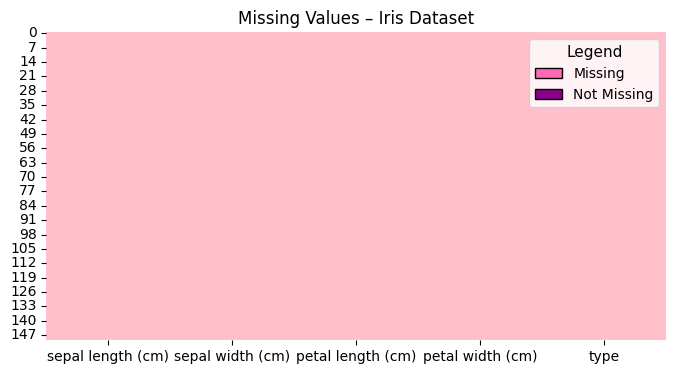

In [8]:
# 0 = Not Missing, 1 = Missing
missing_mask = iris.isnull().astype(int)

plt.figure(figsize=(8,4))


sns.heatmap(missing_mask, cmap=cmap, cbar=False)

# Create discrete legend boxes
legend_elements = [
    Patch(facecolor="#FF69B4", edgecolor="black", label="Missing"),
    Patch(facecolor="#8B008B", edgecolor="black", label="Not Missing")
]

# Add legend
plt.legend(
    handles=legend_elements,
    loc='upper right',
    title='Legend',
    frameon=True,
    fontsize=10,
    title_fontsize=11
)

plt.title("Missing Values – Iris Dataset")
plt.show()


In [9]:
# Create new feature

iris['new']=(iris.iloc[:,0]*iris.iloc[:,1])/(iris.iloc[:,2]*iris.iloc[:,3])

In [10]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,new
0,5.1,3.5,1.4,0.2,0,63.750000
1,4.9,3.0,1.4,0.2,0,52.500000
2,4.7,3.2,1.3,0.2,0,57.846154
3,4.6,3.1,1.5,0.2,0,47.533333
4,5.0,3.6,1.4,0.2,0,64.285714
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1.680602
146,6.3,2.5,5.0,1.9,2,1.657895
147,6.5,3.0,5.2,2.0,2,1.875000
148,6.2,3.4,5.4,2.3,2,1.697262


In [11]:
# Sample 80% of Data for Regression Model

X_train, X_test, y_train, y_test = tts(
    iris.iloc[:, 0:3],        # predictors: sepal length, sepal width, petal width
    iris.iloc[:, 2],          # TARGET: petal length (numeric)
    test_size=0.2,
    random_state=42
)



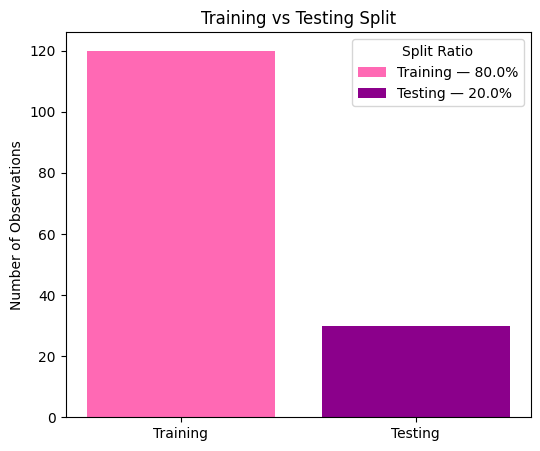

In [12]:


train_n = len(X_train)
test_n  = len(X_test)
total_n = train_n + test_n

# Calculate percentages
train_pct = train_n / total_n * 100
test_pct  = test_n / total_n * 100

plt.figure(figsize=(6,5))
plt.bar(["Training", "Testing"], [train_n, test_n],
        color=["#FF69B4", "#8B008B"])

plt.ylabel("Number of Observations")
plt.title("Training vs Testing Split")

# Custom legend with percentages
legend_elements = [
    Patch(facecolor="#FF69B4", label=f"Training — {train_pct:.1f}%"),
    Patch(facecolor="#8B008B", label=f"Testing — {test_pct:.1f}%")
]

plt.legend(handles=legend_elements, title="Split Ratio", loc="upper right")
plt.show()


In [13]:
X = iris[['sepal length (cm)']]
y = iris['petal length (cm)']

X_train, X_test, y_train, y_test = tts(
    X, y,
    test_size=0.2,
    random_state=42
)

In [14]:
# Regression Model
R_model = LinearRegression()
R_model.fit(X_train, y_train)

yhat_train = R_model.predict(X_train)
yhat_test  = R_model.predict(X_test)


In [15]:
def myf(y, yhat):
    err  = y - yhat
    ME   = np.round(err.mean(), 3)
    MPE  = np.round((err / y).mean(), 3)
    MAE  = np.round(mean_absolute_error(y, yhat), 3)
    MSE  = np.round(mean_squared_error(y, yhat), 3)
    MAPE = np.round(np.mean(np.abs(err / y)), 3)

    print("\nResults:")
    print("ME:   ", ME)
    print("MPE:  ", MPE)
    print("MAE:  ", MAE)
    print("MSE:  ", MSE)
    print("MAPE: ", MAPE)



In [16]:
# Train Metrics

print("\nTrain METRICS")
myf(y_train, yhat_train)



Train METRICS

Results:
ME:    -0.0
MPE:   -0.121
MAE:   0.729
MSE:   0.782
MAPE:  0.288


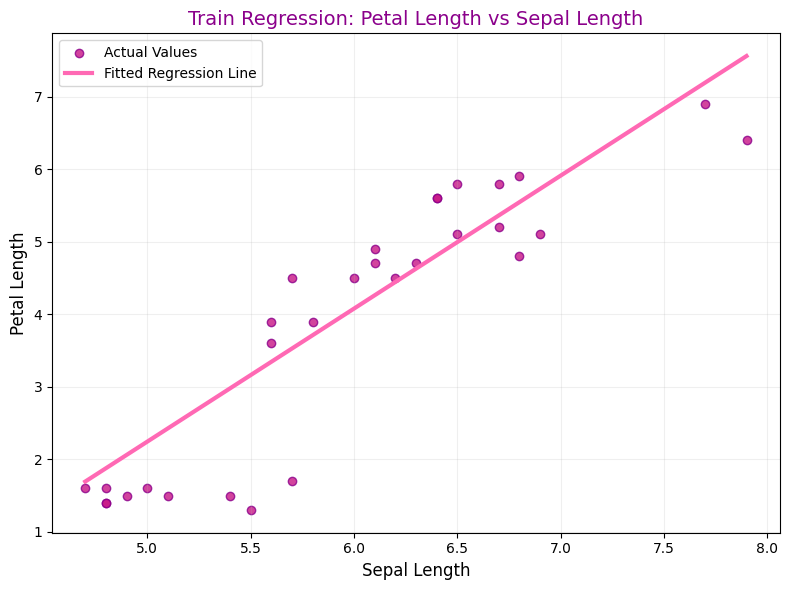

In [17]:
# Train Regression
X_var = X_test.iloc[:, 0]
y_true = y_test
y_pred = yhat_test

# Sort for a smooth regression line
sorted_idx = np.argsort(X_var)
X_sorted = X_var.iloc[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

plt.figure(figsize=(8,6))

# Scatter of actual data points
plt.scatter(
    X_var, y_true,
    color=colors[2],       # medium magenta
    edgecolor=colors[3],   # dark purple border
    alpha=0.8,
    label="Actual Values"
)

# Regression line
plt.plot(
    X_sorted, y_pred_sorted,
    color=colors[1],       # hot pink
    linewidth=3,
    label="Fitted Regression Line"
)

# Title + labels
plt.title("Train Regression: Petal Length vs Sepal Length", fontsize=14, color=colors[3])
plt.xlabel("Sepal Length", fontsize=12)
plt.ylabel("Petal Length", fontsize=12)

plt.grid(alpha=0.2)
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
# Test Metrics
print("\nTEST METRICS")
myf(y_train, yhat_train)


TEST METRICS

Results:
ME:    -0.0
MPE:   -0.121
MAE:   0.729
MSE:   0.782
MAPE:  0.288


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


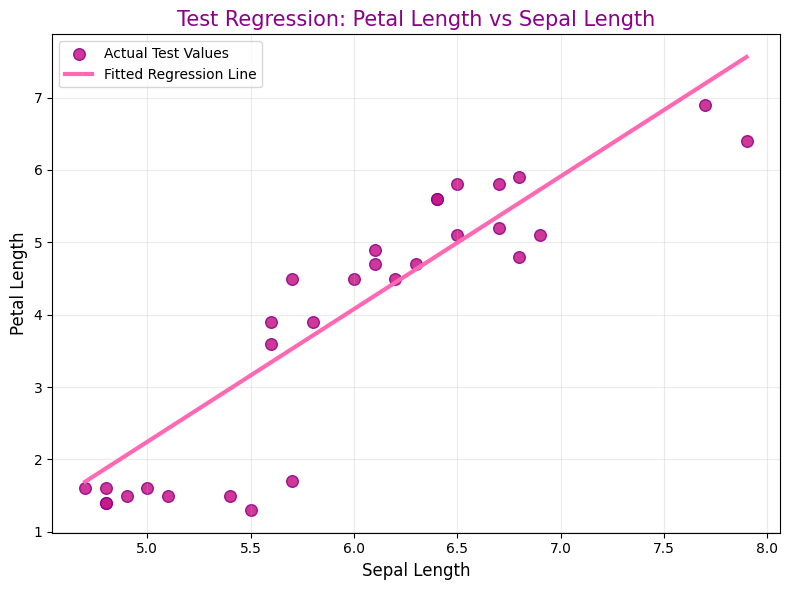

In [19]:
# Testing Regression
X_var = X_test.iloc[:, 0]
y_true = y_test
y_pred = yhat_test

# Create SMOOTH line across the range of testing sepal lengths
x_line = np.linspace(X_var.min(), X_var.max(), 200).reshape(-1, 1)
y_line = R_model.predict(x_line)

plt.figure(figsize=(8,6))

# Scatter of actual test points
plt.scatter(
    X_var, y_true,
    color=colors[2],        # medium magenta
    edgecolor=colors[3],    # dark purple border
    alpha=0.85,
    s=70,
    label="Actual Test Values"
)

# Smooth regression line
plt.plot(
    x_line, y_line,
    color=colors[1],        # hot pink
    linewidth=3,
    label="Fitted Regression Line"
)

# Title + labels
plt.title("Test Regression: Petal Length vs Sepal Length", fontsize=15, color=colors[3])
plt.xlabel("Sepal Length", fontsize=12)
plt.ylabel("Petal Length", fontsize=12)

plt.grid(alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
def myf2(y, yhat):
    y = np.array(y)
    yhat = np.array(yhat)

    err = y - yhat

    # Basic metrics
    ME  = np.round(err.mean(), 3)
    MAE = np.round(mean_absolute_error(y, yhat), 3)
    MSE = np.round(mean_squared_error(y, yhat), 3)

    # Handle percentage errors safely
    with np.errstate(divide='ignore', invalid='ignore'):
        mpe_vals  = err / y
        mape_vals = np.abs(err / y)

        # Replace invalid divisions with NaN
        mpe_vals  = np.where(np.isfinite(mpe_vals), mpe_vals, np.nan)
        mape_vals = np.where(np.isfinite(mape_vals), mape_vals, np.nan)

    # Percentage metrics
    MPE  = np.round(np.nanmean(mpe_vals), 3)
    MAPE = np.round(np.nanmean(mape_vals), 3)

    # Print results
    print("\nResults:")
    print("ME:    ", ME)
    print("MPE:   ", MPE)
    print("MAE:   ", MAE)
    print("MSE:   ", MSE)
    print("MAPE:  ", MAPE)


In [38]:

print("\nSecond Train METRICS")
myf2(y_train, yhat_train)


Second Train METRICS

Results:
ME:     -0.008
MPE:    0.018
MAE:    0.025
MSE:    0.025
MAPE:   0.018


In [25]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

R_model2 = LinearRegression()
R_model2.fit(X2_train, y2_train)


LinearRegression()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


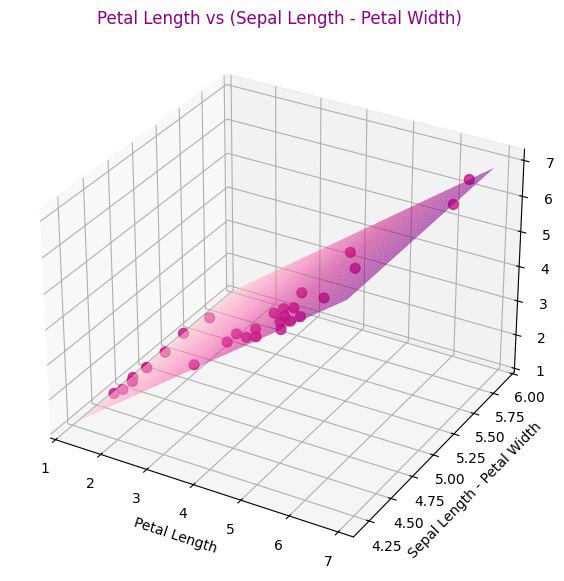

In [27]:
# Extract the two predictors from X2_test
feat1 = X2_test["petal_length"]
feat2 = X2_test["sepal_minus_petal_width"]
y_true = y2_test

# Create meshgrid for smooth regression surface
f1_range = np.linspace(feat1.min(), feat1.max(), 40)
f2_range = np.linspace(feat2.min(), feat2.max(), 40)
F1, F2 = np.meshgrid(f1_range, f2_range)

# Flatten meshgrid & predict using R_model2
grid = np.column_stack([F1.ravel(), F2.ravel()])
Z = R_model2.predict(grid).reshape(F1.shape)

# Plotting
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter test points
ax.scatter(
    feat1, feat2, y_true,
    color=colors[2], s=50,
    label="Actual data", alpha=0.8
)

# Regression surface
ax.plot_surface(F1, F2, Z, cmap=cmap, alpha=0.6)

ax.set_xlabel("Petal Length")
ax.set_ylabel("Sepal Length - Petal Width")
ax.set_zlabel("Predicted Petal Length")
ax.set_title("Petal Length vs (Sepal Length - Petal Width)", color=colors[3])

plt.show()

In [42]:
# Test Metrics
print("\nSECOND TEST METRICS")
myf2(y_test, yhat_test)



SECOND TEST METRICS

Results:
ME:     -0.033
MPE:    0.071
MAE:    0.1
MSE:    0.1
MAPE:   0.071


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


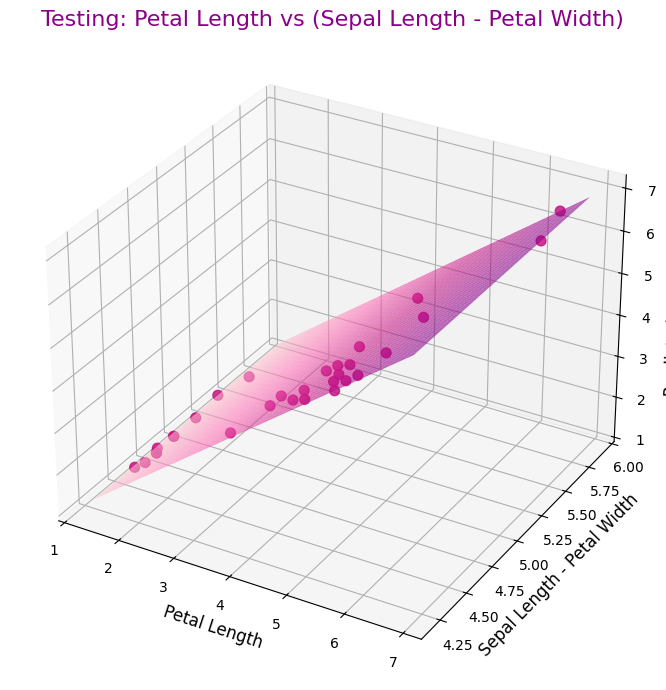

In [44]:
# Extract the two predictors from X2_test (TEST DATA)
feat1 = X2_test["petal_length"]
feat2 = X2_test["sepal_minus_petal_width"]
y_true = y2_test

# Create meshgrid for smooth regression surface
f1_range = np.linspace(feat1.min(), feat1.max(), 40)
f2_range = np.linspace(feat2.min(), feat2.max(), 40)
F1, F2 = np.meshgrid(f1_range, f2_range)

# Flatten meshgrid & predict using R_model2
grid = np.column_stack([F1.ravel(), F2.ravel()])
Z = R_model2.predict(grid).reshape(F1.shape)

# Plotting
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter TEST POINTS
ax.scatter(
    feat1, feat2, y_true,
    color=colors[2], s=50,
    label="Actual Test Data", alpha=0.85
)

# Regression surface
ax.plot_surface(F1, F2, Z, cmap=cmap, alpha=0.6, label="Regression Surface")

# Updated labels to reflect TEST DATA
ax.set_xlabel("Petal Length", fontsize=12)
ax.set_ylabel("Sepal Length - Petal Width", fontsize=12)
ax.set_zlabel("Predicted Petal Length", fontsize=12)

# Updated title to reflect TEST DATA
ax.set_title("Testing: Petal Length vs (Sepal Length - Petal Width)", fontsize=16, color=colors[3])

plt.tight_layout()
plt.show()


In [28]:
# Classification Model
# Feature 1: petal length
iris['est1_petal_length'] = iris.iloc[:, 2]

# Feature 2: sepal length - petal width
sepal_length = iris.iloc[:, 0]
petal_width  = iris.iloc[:, 3]
iris['est2_sepal_minus_petal_width'] = sepal_length - petal_width

# Binary target based on median sepal length
median_sepal = sepal_length.median()
iris['sepal_length_class'] = (sepal_length > median_sepal).astype(int)



In [29]:

X = iris[['est1_petal_length', 'est2_sepal_minus_petal_width']]
y = iris['sepal_length_class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y          # keeps class balance in train/test
)


In [30]:
C_model = LogisticRegression()
C_model.fit(X_train, y_train)

LogisticRegression()

In [31]:
yhat_train = C_model.predict(X_train)
yhat_test  = C_model.predict(X_test)

In [32]:
train_acc = accuracy_score(y_train, yhat_train)
train_cm  = confusion_matrix(y_train, yhat_train)

print("Training Accuracy:", np.round(train_acc, 3))
print("\nTraining Classification Report:\n",
      classification_report(y_train, yhat_train))

Training Accuracy: 0.975

Training Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.96      0.98      0.97        56

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



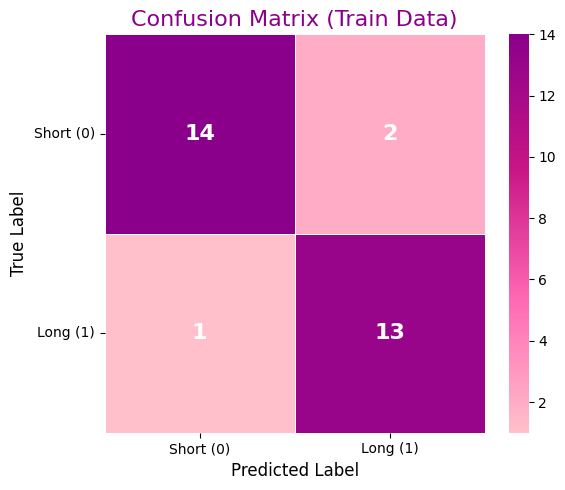

In [45]:
# Compute confusion matrix
cm = confusion_matrix(y_test, yhat_test)

plt.figure(figsize=(6,5))

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap=cmap,
    linewidths=0.5,
    linecolor="white",
    cbar=True,
    annot_kws={"size":16, "weight": "bold", "color":"white"}
)

plt.title("Confusion Matrix (Train Data)", fontsize=16, color=colors[3])
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

plt.xticks([0.5, 1.5], ["Short (0)", "Long (1)"])
plt.yticks([0.5, 1.5], ["Short (0)", "Long (1)"], rotation=0)

plt.tight_layout()
plt.show()

In [46]:
# Test Accuracy
test_acc = accuracy_score(y_test, yhat_test)
test_cm  = confusion_matrix(y_test, yhat_test)

print("Test Accuracy:", np.round(test_acc, 3))
print("\nTest Classification Report:\n",
      classification_report(y_test, yhat_test))

Test Accuracy: 0.9

Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.87      0.93      0.90        14

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



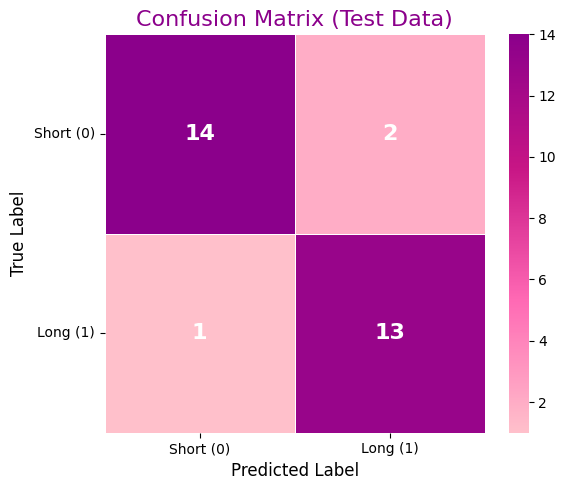

In [53]:
# Compute confusion matrix for TEST data (2 classes: 0 and 1)
cm2 = confusion_matrix(y_test, yhat_test)

plt.figure(figsize=(6,5))

sns.heatmap(
    cm2,
    annot=True,
    fmt="d",
    cmap=cmap,
    linewidths=0.5,
    linecolor="white",
    cbar=True,
    annot_kws={"size":16, "weight": "bold", "color":"white"}
)

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

# Tick labels for ONLY TWO CLASSES
plt.xticks([0.5, 1.5], ["Short (0)", "Long (1)"])
plt.yticks([0.5, 1.5], ["Short (0)", "Long (1)"], rotation=0)

plt.title("Confusion Matrix (Test Data)", fontsize=16, color=colors[3])
plt.tight_layout()
plt.show()
